In [33]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract


In [10]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_prcp = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()

In [11]:
june_df = pd.DataFrame(june_prcp, columns=['june prcp'])
june_df.head()

,june prcp
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00


In [12]:
june_df.describe()

,june prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [13]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
dec_prcp = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec_df = pd.DataFrame(dec_prcp, columns=['dec prcp'])
dec_df.describe()

,dec prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [34]:
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and temp scores
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= prev_year).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','temp'])
df.set_index(df['date'], inplace=True)
# print(df)
# print(df.to_string(index=False))

# Sort the dataframe by date
df = df.sort_index()
print(df.to_string(index=False))

      date  temp
2016-08-23  81.0
2016-08-23  80.0
2016-08-23  77.0
2016-08-23  80.0
2016-08-23  76.0
2016-08-23  74.0
2016-08-23  80.0
2016-08-24  79.0
2016-08-24  77.0
2016-08-24  80.0
2016-08-24  78.0
2016-08-24  74.0
2016-08-24  79.0
2016-08-24  76.0
2016-08-25  80.0
2016-08-25  81.0
2016-08-25  80.0
2016-08-25  80.0
2016-08-25  81.0
2016-08-25  77.0
2016-08-25  77.0
2016-08-26  78.0
2016-08-26  80.0
2016-08-26  84.0
2016-08-26  81.0
2016-08-26  81.0
2016-08-26  79.0
2016-08-27  73.0
2016-08-27  75.0
2016-08-27  77.0
2016-08-27  81.0
2016-08-27  81.0
2016-08-27  74.0
2016-08-28  73.0
2016-08-28  81.0
2016-08-28  78.0
2016-08-28  80.0
2016-08-28  73.0
2016-08-28  71.0
2016-08-29  78.0
2016-08-29  80.0
2016-08-29  80.0
2016-08-29  79.0
2016-08-29  78.0
2016-08-29  78.0
2016-08-29  78.0
2016-08-30  77.0
2016-08-30  79.0
2016-08-30  76.0
2016-08-30  75.0
2016-08-30  79.0
2016-08-30  78.0
2016-08-31  77.0
2016-08-31  80.0
2016-08-31  78.0
2016-08-31  80.0
2016-08-31  79.0
2016-08-31  76

<AxesSubplot:ylabel='Frequency'>

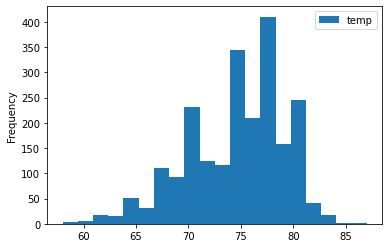

In [39]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.hist(bins = 20)

In [44]:
results = session.query(Measurement.tobs).all()
df = pd.DataFrame(results, columns=['tobs'])
print(df)

       tobs
0      65.0
1      63.0
2      74.0
3      76.0
4      73.0
...     ...
19545  71.0
19546  78.0
19547  76.0
19548  76.0
19549  76.0

[19550 rows x 1 columns]


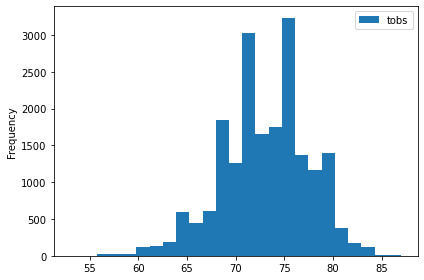

In [46]:
df.plot.hist(bins=25)
plt.tight_layout()